In [229]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from decimal import *

filename = '../Data/merged_data.csv'
df = pd.read_csv(filename, dtype={'NEXT OPEN HOUSE START TIME': 'str', 'NEXT OPEN HOUSE END TIME': 'str'})
print(df.shape)
print(df.columns)

#delete duplicate rows in dataframe
df_nodup = df.drop_duplicates(subset = ['ADDRESS', 'CITY'])
print(df_nodup.shape)

#delete useless columns
df_dropcol = df_nodup.drop(['Unnamed: 0', 'SALE TYPE', 'STATE', 'DAYS ON MARKET', 
                            'STATUS', 'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME', 'FAVORITE', 
                            'INTERESTED', 'SOURCE', 'MLS#', 'LOCATION',
                            'URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)'], axis = 1)
print(df_dropcol.shape)

#delete rows with missing values in important columns
df_na = df_dropcol.replace('', np.nan)
#df_nomissing = df_na.dropna(subset = ['SOLD DATE', 'PROPERTY TYPE', 'ADDRESS', 'CITY', 'ZIP', 'PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 'YEAR BUILT']) 
df_nomissing = df_na.dropna(subset = ['PROPERTY TYPE', 'PRICE', 'SQUARE FEET']) 
print(df_nomissing.shape)


(69468, 28)
Index(['Unnamed: 0', 'SALE TYPE', 'SOLD DATE', 'PROPERTY TYPE', 'ADDRESS',
       'CITY', 'STATE', 'ZIP', 'PRICE', 'BEDS', 'BATHS', 'LOCATION',
       'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'DAYS ON MARKET',
       '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME',
       'NEXT OPEN HOUSE END TIME',
       'URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)',
       'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'LATITUDE', 'LONGITUDE'],
      dtype='object')
(41250, 28)
(41250, 15)
(39895, 15)


In [230]:
# delete rows which property type is unknown/other/vacant land/Multi-Family
df_protype = df_nomissing[df_nomissing['PROPERTY TYPE'] != 'Unknown']
df_protype = df_protype[df_protype['PROPERTY TYPE'] != 'Vacant Land']
df_protype = df_protype[df_protype['PROPERTY TYPE'] != 'Other']
df_protype = df_protype[df_protype['PROPERTY TYPE'] != 'Mobile/Manufactured Home']
df_protype = df_protype[df_protype['PROPERTY TYPE'] != 'Multi-Family (2-4 Unit)']
df_protype = df_protype[df_protype['PROPERTY TYPE'] != 'Multi-Family (5+ Unit)']
df_protype.shape

(37898, 15)

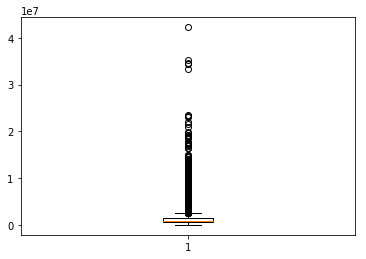

In [231]:
plt.boxplot(df_protype['PRICE'])
plt.show()

In [232]:
# plt.boxplot(df_protype['BEDS'])
# plt.show()

In [233]:
# plt.boxplot(df_protype['BATHS'])
# plt.show()

In [234]:
# delete outliers
df_byvalue = df_protype.sort_values(by = ['PRICE'])
df_nooutlier = df_byvalue[df_byvalue['PRICE'] > 100000]

In [235]:
df_nooutlier.sort_values(by = ['BEDS']).tail(20)

,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,ZIP,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,$/SQUARE FEET,HOA/MONTH,LATITUDE,LONGITUDE
2862,NaN,Condo/Co-op,1282 Sacramento St,San Francisco,94108,1368000.0,NaN,NaN,1742.0,NaN,1909.0,785.0,NaN,37.792542,-122.413981
2946,NaN,Condo/Co-op,101 Lombard St #101,San Francisco,94111,1450000.0,NaN,2.0,1238.0,NaN,1983.0,1171.0,NaN,37.803520,-122.404389
54294,NaN,Single Family Residential,395 Shawnee Pl,Fremont,94539,1451000.0,NaN,NaN,1945.0,8467.0,1977.0,746.0,NaN,37.474469,-121.914277
3336,NaN,Single Family Residential,1375 Plymouth Ave,San Francisco,94112,1540000.0,NaN,1.0,1460.0,3645.0,1919.0,1055.0,NaN,37.727254,-122.456757
3384,NaN,Condo/Co-op,2916 Fillmore St #9,San Francisco,94123,1550000.0,NaN,2.0,1367.0,NaN,1906.0,1134.0,NaN,37.796462,-122.435204
2526,NaN,Single Family Residential,36 Kronquist Ct,San Francisco,94131,1580000.0,NaN,1.0,1250.0,1873.0,1949.0,1264.0,NaN,37.746664,-122.435141
3358,NaN,Single Family Residential,314 Duncan St,San Francisco,94131,1600000.0,NaN,1.0,1242.0,2465.0,1900.0,1288.0,NaN,37.746283,-122.427647
3644,NaN,Single Family Residential,103 Mendosa Ave,San Francisco,94116,1650000.0,NaN,3.0,2566.0,3362.0,1965.0,643.0,NaN,37.748013,-122.466426
2966,NaN,Condo/Co-op,2263 Francisco St,San Francisco,94123,1700000.0,NaN,NaN,1246.0,NaN,1924.0,1364.0,NaN,37.800715,-122.442303
3163,NaN,Single Family Residential,110 Montcalm St,San Francisco,94110,1710000.0,NaN,1.0,1700.0,1750.0,1900.0,1006.0,NaN,37.746523,-122.407062


In [236]:
df_nooutlier.sort_values(by = ['BATHS']).tail(20)

,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,ZIP,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,$/SQUARE FEET,HOA/MONTH,LATITUDE,LONGITUDE
13617,June-20-2016,Single Family Residential,285 3rd St,Montara,94037.0,800000.0,1.0,NaN,600.0,10000.0,1971.0,1333.0,NaN,37.544370,-122.512616
48831,NaN,Single Family Residential,146 Sea Brg,Alameda,94502,850000.0,NaN,NaN,1756.0,5290.0,1980.0,484.0,NaN,37.743173,-122.238693
3726,NaN,Condo/Co-op,3450 3rd St Ste 3G,San Francisco,94124,850000.0,NaN,NaN,3059.0,NaN,1987.0,278.0,NaN,37.745758,-122.387817
3131,NaN,Condo/Co-op,1 Federal St Apt 48,San Francisco,94107,850000.0,NaN,NaN,797.0,NaN,2003.0,1066.0,NaN,37.783967,-122.391121
58390,NaN,Single Family Residential,1530 Almond Ave Unit B,Livermore,94550,895000.0,NaN,NaN,1398.0,85418.0,NaN,640.0,NaN,37.676113,-121.739543
63605,NaN,Single Family Residential,630 Happy Valley Rd,Pleasanton,94566,900000.0,NaN,NaN,2632.0,43560.0,1967.0,342.0,NaN,37.635762,-121.877725
52047,NaN,Single Family Residential,2921 Stringham Way,Dublin,94568,922000.0,4.0,NaN,0.0,2535.0,2017.0,NaN,NaN,37.709900,-121.854000
59349,NaN,Single Family Residential,8537 Jetty Way,Newark,94560,923500.0,0.0,NaN,0.0,2159.0,NaN,NaN,NaN,37.516957,-122.048554
57606,NaN,Single Family Residential,248 Trevarno Rd,Livermore,94551,950000.0,NaN,NaN,2400.0,28400.0,1913.0,396.0,NaN,37.692117,-121.749505
57640,NaN,Single Family Residential,6200 Mines Rd,Livermore,94550,1100000.0,NaN,NaN,2021.0,256568.0,1970.0,544.0,NaN,37.635215,-121.706838


In [237]:
df_nooutlier.shape

(37781, 15)

In [238]:
df_nooutlier.head()

,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,ZIP,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,$/SQUARE FEET,HOA/MONTH,LATITUDE,LONGITUDE
10091,NaN,Single Family Residential,1123 Brunswick St,Daly City,94014,100500.0,2.0,1.0,1030.0,2500.0,1916.0,98.0,NaN,37.705789,-122.456480
56559,NaN,Single Family Residential,17382 Via La Jolla,San Lorenzo,94580,101000.0,3.0,2.0,1229.0,5200.0,1951.0,82.0,NaN,37.665810,-122.135079
41052,NaN,Single Family Residential,888 Palm St,San Jose,95110,102000.0,2.0,1.0,884.0,6750.0,1913.0,115.0,NaN,37.319633,-121.886415
41881,NaN,Condo/Co-op,1750 Halford Ave Apt 105,Santa Clara,95051,102000.0,1.0,1.0,678.0,NaN,1970.0,150.0,NaN,37.355715,-121.998715
53635,NaN,Single Family Residential,5502 Vallejo St,Oakland,94608,102500.0,2.0,1.0,657.0,4000.0,1908.0,156.0,NaN,37.838201,-122.284831


In [239]:
df_nooutlier = df_nooutlier.replace('Single Family Residential', 'SFH')
df_nooutlier = df_nooutlier.replace('Townhouse', 'TH')
df_nooutlier = df_nooutlier.replace('Condo/Co-op', 'Condo')

In [240]:
df_nooutlier['CITY'] = df_nooutlier['CITY'].astype(str).apply(lambda city: city.upper())
df_nooutlier = df_nooutlier.replace('S San Francisco', 'SOUTH SAN FRANCISCO')
df_nooutlier = df_nooutlier.replace('So. San Francisco', 'SOUTH SAN FRANCISCO')
df_nooutlier = df_nooutlier.replace('Redwood Shores', 'REDWOOD CITY')
df_nooutlier = df_nooutlier[df_nooutlier['CITY'] != 'Out of Area']
df_nooutlier = df_nooutlier[df_nooutlier['CITY'] != 'Outside Arizona']

In [241]:
# delete rows which SQUARE FEET is abnormal
df_nooutlier = df_nooutlier[df_nooutlier['SQUARE FEET'] > 300]
df_nooutlier = df_nooutlier[df_nooutlier['SQUARE FEET'] < 30000]

In [242]:
df_nooutlier.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37759 entries, 10091 to 7320
Data columns (total 15 columns):
SOLD DATE        30846 non-null object
PROPERTY TYPE    37759 non-null object
ADDRESS          37743 non-null object
CITY             37759 non-null object
ZIP              37758 non-null object
PRICE            37759 non-null float64
BEDS             37658 non-null float64
BATHS            37723 non-null float64
SQUARE FEET      37759 non-null float64
LOT SIZE         32590 non-null float64
YEAR BUILT       37641 non-null float64
$/SQUARE FEET    37744 non-null float64
HOA/MONTH        11548 non-null float64
LATITUDE         37759 non-null float64
LONGITUDE        37759 non-null float64
dtypes: float64(10), object(5)
memory usage: 4.6+ MB


In [243]:
df_nooutlier['$/SQUARE FEET'] = df_nooutlier['PRICE']/df_nooutlier['SQUARE FEET'] 

In [244]:
df_nooutlier['PRICE'] = df_nooutlier['PRICE']/1000.0
df_nooutlier.rename(columns={'PRICE':'PRICE IN K'}, inplace=True)

In [245]:
county = '../Data/county.csv'
county_city = pd.read_csv(county)

In [246]:
df = pd.merge(df_nooutlier, county_city, how = 'left', on = 'CITY')

In [247]:
df.to_csv('../Data/cleaned_data.csv')

In [248]:
df.shape

(37759, 16)

In [249]:
df.head()

,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,ZIP,PRICE IN K,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,$/SQUARE FEET,HOA/MONTH,LATITUDE,LONGITUDE,COUNTY
0,NaN,SFH,1123 Brunswick St,DALY CITY,94014,100.5,2.0,1.0,1030.0,2500.0,1916.0,97.572816,NaN,37.705789,-122.456480,SAN MATEO
1,NaN,SFH,17382 Via La Jolla,SAN LORENZO,94580,101.0,3.0,2.0,1229.0,5200.0,1951.0,82.180635,NaN,37.665810,-122.135079,ALAMEDA
2,NaN,SFH,888 Palm St,SAN JOSE,95110,102.0,2.0,1.0,884.0,6750.0,1913.0,115.384615,NaN,37.319633,-121.886415,SANTA CLARA
3,NaN,Condo,1750 Halford Ave Apt 105,SANTA CLARA,95051,102.0,1.0,1.0,678.0,NaN,1970.0,150.442478,NaN,37.355715,-121.998715,SANTA CLARA
4,NaN,SFH,5502 Vallejo St,OAKLAND,94608,102.5,2.0,1.0,657.0,4000.0,1908.0,156.012177,NaN,37.838201,-122.284831,ALAMEDA


In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37759 entries, 0 to 37758
Data columns (total 16 columns):
SOLD DATE        30846 non-null object
PROPERTY TYPE    37759 non-null object
ADDRESS          37743 non-null object
CITY             37759 non-null object
ZIP              37758 non-null object
PRICE IN K       37759 non-null float64
BEDS             37658 non-null float64
BATHS            37723 non-null float64
SQUARE FEET      37759 non-null float64
LOT SIZE         32590 non-null float64
YEAR BUILT       37641 non-null float64
$/SQUARE FEET    37759 non-null float64
HOA/MONTH        11548 non-null float64
LATITUDE         37759 non-null float64
LONGITUDE        37759 non-null float64
COUNTY           37521 non-null object
dtypes: float64(10), object(6)
memory usage: 4.9+ MB


In [252]:
los = df.loc[df['CITY'] == 'LOS ALTOS HILLS']

In [253]:
los.sort_values(['$/SQUARE FEET'])

,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,ZIP,PRICE IN K,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,$/SQUARE FEET,HOA/MONTH,LATITUDE,LONGITUDE,COUNTY
26732,NaN,SFH,27636 Briones Ct,LOS ALTOS HILLS,94022,1323.0,4.0,3.0,6670.0,43560.0,1971.0,198.350825,NaN,37.366668,-122.163121,SANTA CLARA
7538,NaN,SFH,12384 Priscilla Ln,LOS ALTOS HILLS,94022,598.0,3.0,2.0,1776.0,46281.0,1952.0,336.711712,NaN,37.357902,-122.120985,SANTA CLARA
27358,NaN,SFH,26450 Aric Ln,LOS ALTOS HILLS,94022,1364.0,4.0,3.0,3896.0,47044.0,1946.0,350.102669,NaN,37.390007,-122.140382,SANTA CLARA
36542,NaN,SFH,12869 La Cresta Dr,LOS ALTOS HILLS,94022,3500.0,5.0,6.0,8527.0,53578.0,2013.0,410.460889,NaN,37.382988,-122.145846,SANTA CLARA
31835,July-7-2016,SFH,11470 Page Mill Rd,LOS ALTOS HILLS,94022,1801.0,4.0,3.0,4220.0,31849.0,1940.0,426.777251,NaN,37.360425,-122.170293,SANTA CLARA
35573,April-13-2016,SFH,10625 Eloise Cir,LOS ALTOS HILLS,94024,2800.0,4.0,3.5,5600.0,49222.0,1954.0,500.000000,35.0,37.343073,-122.103083,SANTA CLARA
36960,March-21-2016,SFH,10650 Magdalena Rd,LOS ALTOS HILLS,94024,4050.0,5.0,5.0,6729.0,44866.0,2005.0,601.872492,NaN,37.343997,-122.118092,SANTA CLARA
36794,June-3-2015,SFH,11920 Rhus Ridge Rd,LOS ALTOS HILLS,94022,3790.0,5.0,3.0,5624.0,1.0,1971.0,673.897582,NaN,37.352745,-122.138762,SANTA CLARA
37005,April-15-2016,SFH,28001 Arastradero Rd,LOS ALTOS HILLS,94022,4188.0,5.0,5.5,6025.0,46583.0,1991.0,695.103734,NaN,37.384473,-122.166386,SANTA CLARA
36595,November-20-2015,SFH,11688 Dawson Dr,LOS ALTOS HILLS,94024,3510.0,6.0,4.5,5019.0,74052.0,1985.0,699.342499,NaN,37.352650,-122.116499,SANTA CLARA
